In [23]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


There are 60,000 labels/images in the training set with each image being 28 x 28 pixels
There are 10,000 labels/images in the testing set with each image being 28 x 28 pixels

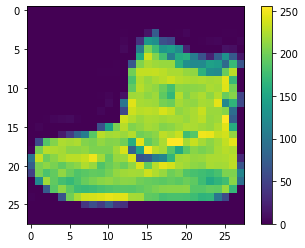

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In order to feed these images into our neural network, we need to scale these values from 0 to 1


In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

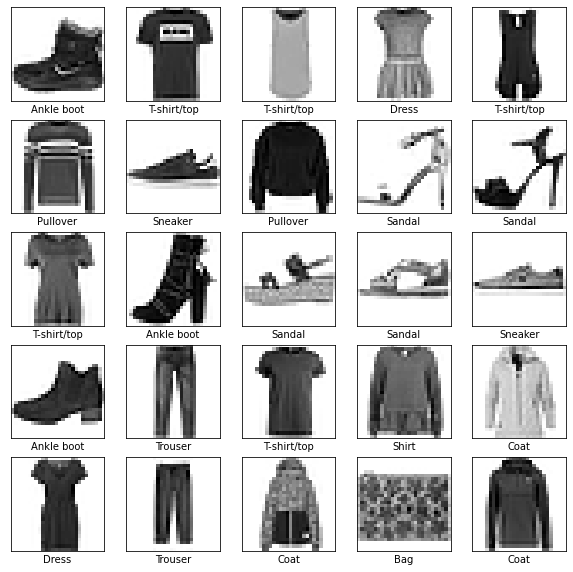

In [14]:
# first 25 images in the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # flatten transforms our 2d array into a 1d array
    tf.keras.layers.Dense(128, activation='relu'), # first dense layer has 128 neurons
    tf.keras.layers.Dense(10) # the image belongs to one of the 10 classes
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4907 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3714 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3335 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3094 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2940 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2781 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2692 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2547 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2476 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.237

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3458 - accuracy: 0.8805 - 511ms/epoch - 2ms/step

Test accuracy: 0.8805000185966492


In [19]:
#we will now recieve a probability for each one of the 10 classes
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) 

In [20]:
predictions = probability_model.predict(test_images)

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

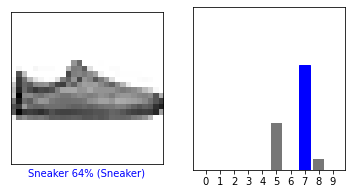

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Now let's do the same for even more images!

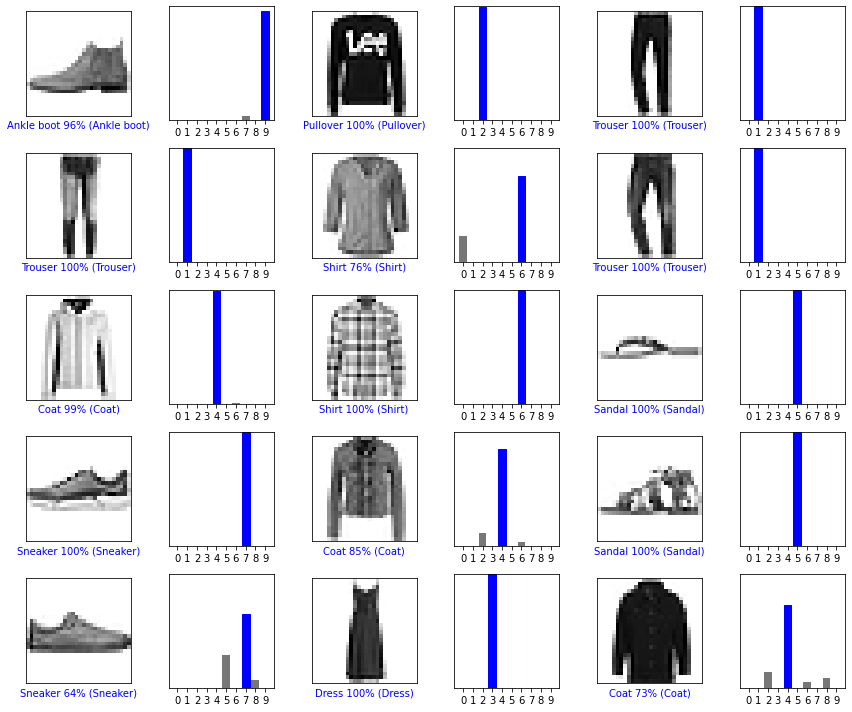

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Resource: https://www.tensorflow.org/tutorials/images/classification